In [20]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.stats import linregress

In [72]:
#Defino los puntos 
x = np.linspace(2,3,11)
y = [2.78, 3.29, 3.29, 3.33, 3.23, 3.69, 3.46, 3.87, 3.62, 3.40, 3.99]
sigma = 0.3

In [73]:
a1 = []
a2 = []


for i in range(3000):
    valores_y = (np.random.normal(loc = y, scale = sigma))
    a1.append(linregress(x,valores_y)[1])
    a2.append(linregress(x,valores_y)[0])

mean_a1 = np.round(np.mean(a1),5)
mean_a2 = np.round(np.mean(a2),5)

In [74]:
linregress(x,y)

LinregressResult(slope=0.7990909090909092, intercept=1.4522727272727272, rvalue=0.7919240297093962, pvalue=0.0036707245107046945, stderr=0.20538190366839448, intercept_stderr=0.517546096836582)

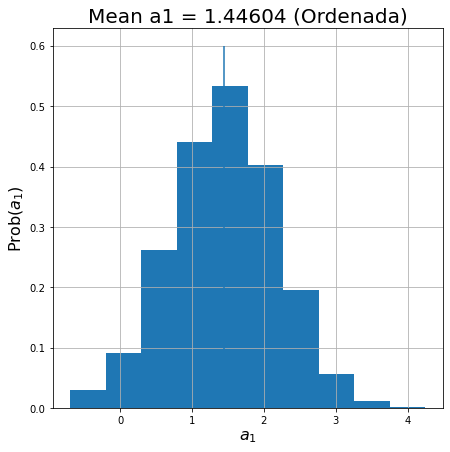

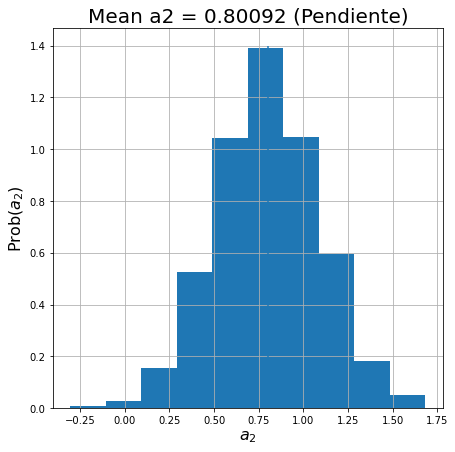

In [75]:
plt.figure(figsize=(7,7))
plt.hist(a1,density=True)
plt.title('Mean a1 = 'f'{mean_a1}'+' (Ordenada)',size=20)
plt.grid()
plt.ylabel('Prob($a_{1}$)',size = 16)
plt.xlabel('$a_{1}$',size = 16)
plt.vlines(mean_a1,0,0.6)


plt.figure(figsize=(7,7))
plt.hist(a2,density=True)
plt.title('Mean a2 = 'f'{mean_a2}'+' (Pendiente)',size=20)
plt.grid()
plt.ylabel('Prob($a_{2}$)',size = 16)
plt.xlabel('$a_{2}$',size = 16)
plt.vlines(mean_a2,0,1.4)


In [76]:
x_var = np.linspace(0,5,500)
cov_matrix = np.cov(a1,a2)
Var_corr = cov_matrix[0][0] + (2*x_var*cov_matrix[0][1]) + ((x_var**2)*cov_matrix[1][1])
Var_sin_corr = cov_matrix[0][0] + ((x_var**2)*cov_matrix[1][1])

La expresión de la recta es : $y =  a_{1} + a_{2} x$ . La varianza para el valor de $y$ es:

$Var(y_{a}) = Var(a_{1}) + 2x_{a}Cov(a_{1}a_{2}) + x_{a}^2 Var(a_{2})$

Grafico la varianza teniendo en cuenta el factor de correlacion y sin el factor de correlacion. 

[]

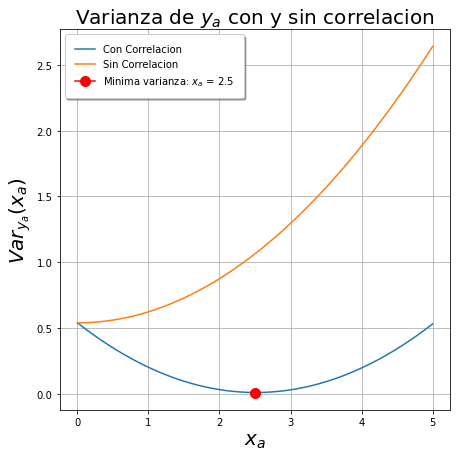

In [77]:
plt.figure(figsize=(7,7))
plt.title('Varianza de $y_{a}$ con y sin correlacion',size=20)
plt.plot(x_var,Var_corr,label='Con Correlacion')
plt.plot(x_var,Var_sin_corr,label='Sin Correlacion')
plt.ylabel('$Var_{y_{a}}$($x_{a}$)',size = 20)
plt.xlabel('$x_{a}$',size = 20)
plt.grid()
plt.plot(x_var[250],Var_corr[250],marker='o',color='red',markersize=10,label='Minima varianza: $x_{a}$ = 2.5')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,prop={'size':10})
plt.plot()

In [78]:
rectay = linregress(x,y)[1] + (linregress(x,y)[0] * x_var)
rectay_ccorrp = rectay + Var_corr
rectay_ccorrn = rectay - Var_corr
rectay_sincorrp = rectay + Var_sin_corr
rectay_sincorrn = rectay - Var_sin_corr
mean = (linregress(x,y)[1],linregress(x,y)[0])

[]

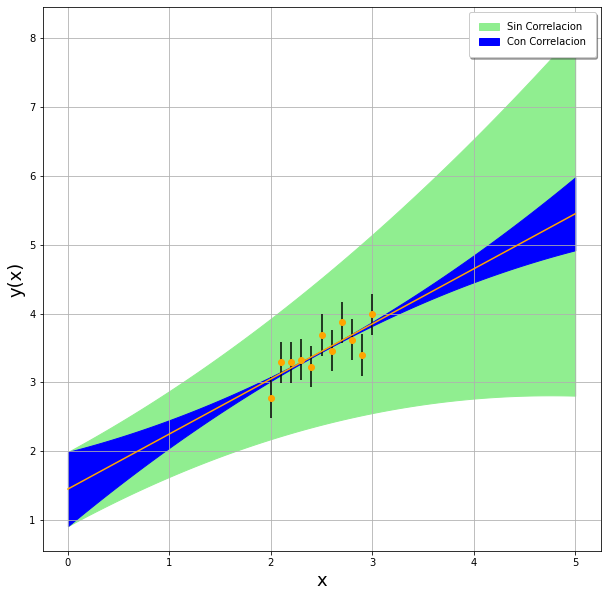

In [79]:
plt.figure(figsize=(10,10))
plt.plot(x_var,rectay,color='orange')
plt.plot(x,y,'o',color='orange')
plt.ylabel('y(x)',size = 18)
plt.xlabel('x',size = 18)
plt.errorbar(x,y,yerr=sigma,ls='none',color='black')
plt.fill_between(x_var,rectay_sincorrp,rectay_sincorrn,color ='lightgreen',label='Sin Correlacion')
plt.fill_between(x_var,rectay_ccorrn,rectay_ccorrp,color = 'blue',label='Con Correlacion')
plt.grid()
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,prop={'size':10})
plt.plot()

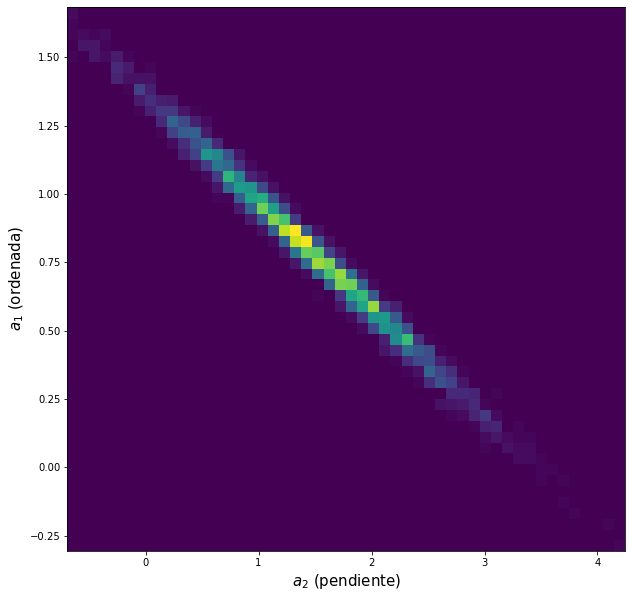

In [80]:
plt.figure(figsize=(10,10))
plt.hist2d(a1,a2,bins=[50,50])
plt.ylabel('$a_{1}$ (ordenada)',size=15)
plt.xlabel('$a_{2}$ (pendiente)',size=15)
plt.show()

In [81]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [35]:
len(a1),len(a2)

(1000, 1000)

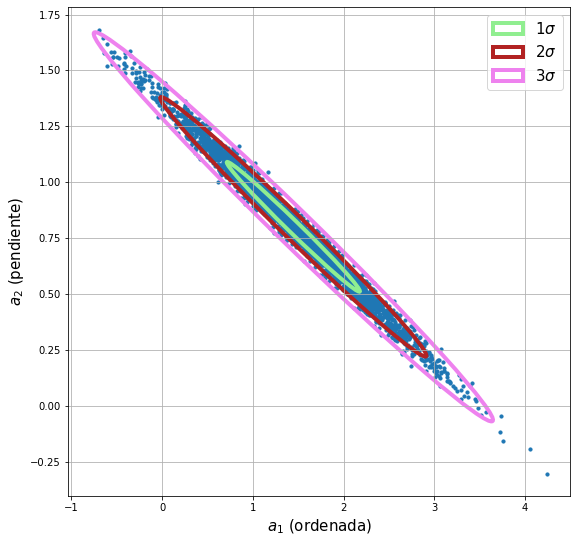

In [96]:
fig,axs = plt.subplots(1,1,figsize=(9,9))
axs.scatter(a1,a2,s=10)
confidence_ellipse(np.asarray(a1),np.asarray(a2), axs, n_std=1,label=r'$1\sigma$', edgecolor='lightgreen',linewidth = 4)
confidence_ellipse(np.asarray(a1),np.asarray(a2), axs, n_std=2,label=r'$2\sigma$', edgecolor='firebrick',linewidth = 4)
confidence_ellipse(np.asarray(a1),np.asarray(a2), axs, n_std=3,label=r'$3\sigma$', edgecolor='violet',linewidth = 4)
axs.set_xlabel('$a_{1}$ (ordenada)',size=15)
axs.set_ylabel('$a_{2}$ (pendiente)',size=15)
axs.legend(fontsize = 15)
axs.grid()